In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## text message->numerical vector

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("spam.csv",encoding="latin")

In [6]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
y=df['Category']

In [9]:
y.value_counts()/len(y)*100

ham     86.593683
spam    13.406317
Name: Category, dtype: float64

# preprocessing

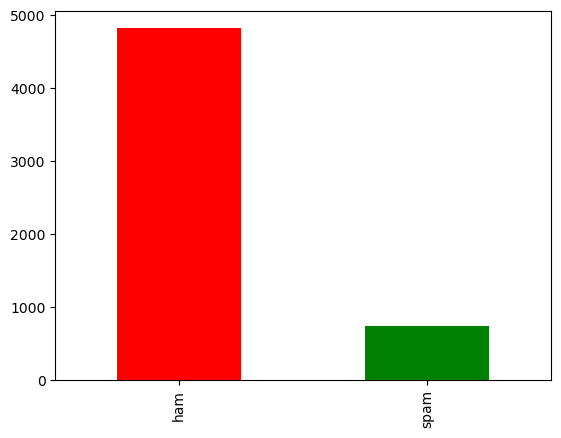

In [10]:
df['Category'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.show()

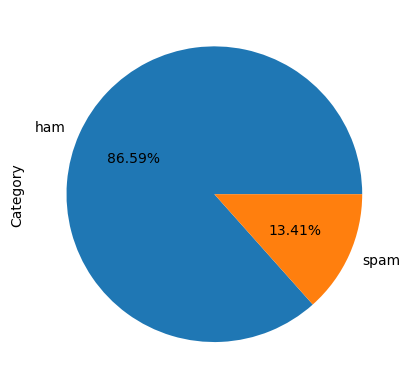

In [11]:
plt.figure(dpi=100)
((df['Category'].value_counts() / df.shape[0])*100).plot(kind='pie', autopct="%0.2f%%")
plt.show()

In [12]:
corpus=df['Message'].values

In [13]:
print(corpus)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [14]:
def process_string(corpus):
    for msg in corpus:
        print(msg)
        break

In [15]:
process_string(corpus)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


### 1.Convert to lowercase

In [16]:
def process_string(corpus):
    i=0
    while i<len(corpus):
        msg=corpus[i]
        corpus[i]=msg.lower()
        i+=1
    return " ".join(corpus)

In [17]:
process_string(corpus)

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s u dun say so early hor... u c already then say... nah i don\'t think he goes to usf, he lives around here though freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, â£1.50 to rcv even my brother is not like to speak with me. they treat me like aids patent. as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press *9 to copy your friends callertune winner!! as a valued network customer you have been selected to receivea â£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more?

In [18]:
string=process_string(corpus)

In [19]:
words=pd.Series(string.split())

In [20]:
words

0             go
1          until
2         jurong
3         point,
4        crazy..
          ...   
86830        its
86831       true
86832         to
86833        its
86834       name
Length: 86835, dtype: object

In [21]:
words.value_counts()

to                2234
i                 2217
you               1921
a                 1433
the               1326
                  ... 
soil..               1
african              1
s....s...india       1
fone...              1
rofl.                1
Length: 13576, dtype: int64

In [22]:
import nltk
import re

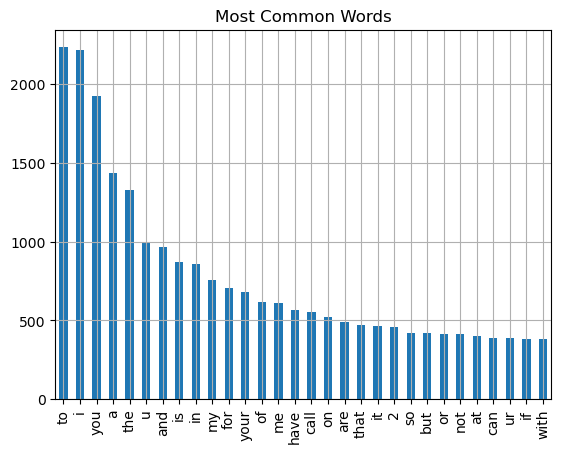

In [23]:
plt.title("Most Common Words")
words.value_counts()[:30].plot(kind='bar')
plt.grid()
plt.show()

In [24]:
string=process_string(corpus)

In [25]:
words=pd.Series(string.split())

In [26]:
words.value_counts()

to                2234
i                 2217
you               1921
a                 1433
the               1326
                  ... 
soil..               1
african              1
s....s...india       1
fone...              1
rofl.                1
Length: 13576, dtype: int64

## 2.remove stopwords

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

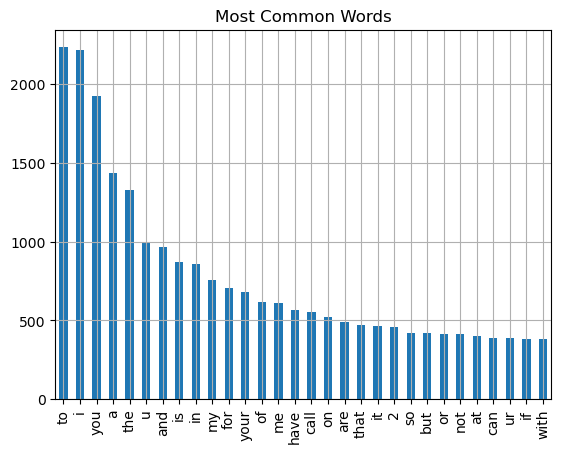

In [28]:
plt.title("Most Common Words")
words.value_counts()[:30].plot(kind='bar')
plt.grid()
plt.show()

In [29]:
from nltk.corpus import stopwords as STOPWORDS

In [30]:
stopwords=STOPWORDS.words('english')

In [31]:
def process_string(corpus,stopwords=[]):
    i=0
    while i<len(corpus):
        msg=corpus[i].lower()
        sentence=[]
        for words in msg.split():
            if words not in stopwords:
                sentence.append(words)
        msg=" ".join(sentence) 
        corpus[i]=msg
        i+=1
    return " ".join(corpus)

In [32]:
string=process_string(corpus,stopwords)

<Axes: >

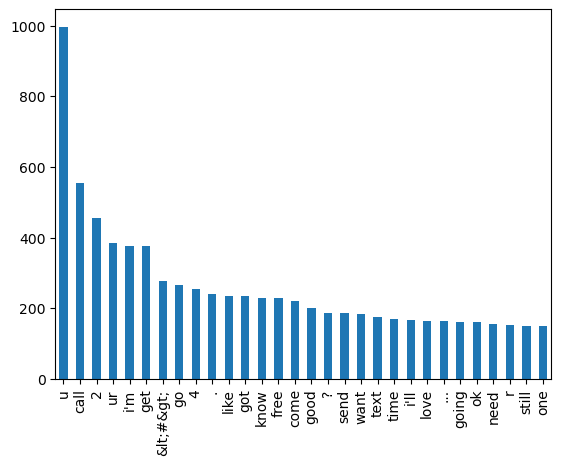

In [33]:
pd.Series(string.split()).value_counts()[:30].plot(kind='bar')

In [34]:
stopwords+=['r','n',"dont",'u','2',"i'm","ur","i'll","4","..."]

In [35]:
def process_string(msg):
    msg=msg.lower()
    sentence=[]
    for words in msg.split():
        if words not in stopwords:
            sentence.append(words)
    msg=" ".join(sentence)
    msg=re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~)]","",msg)
    return msg

In [36]:
df['Message']=df['Message'].apply(process_string)

In [37]:
df

,Category,Message
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried contact u â£750 pound prize cla...
5568,ham,ã¼ b going esplanade fr home
5569,ham,pity mood that soany suggestions
5570,ham,guy bitching acted like id interested buying s...


## 3.remove punctuations

In [38]:
import string

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
string

<module 'string' from 'C:\\Users\\KIIT\\anaconda3\\lib\\string.py'>

In [41]:
df.groupby('Category').groups

{'ham': [0, 1, 3, 4, 6, 7, 10, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 63, 64, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 118, ...], 'spam': [2, 5, 8, 9, 11, 12, 15, 19, 34, 42, 54, 56, 65, 67, 68, 93, 95, 114, 117, 120, 121, 123, 134, 135, 139, 147, 159, 160, 164, 165, 167, 188, 191, 225, 227, 235, 240, 250, 259, 264, 268, 270, 273, 296, 305, 309, 312, 319, 333, 335, 349, 357, 358, 367, 368, 375, 385, 389, 401, 415, 418, 420, 422, 424, 433, 455, 463, 471, 474, 487, 492, 505, 515, 517, 518, 525, 527, 529, 531, 541, 564, 576, 579, 583, 591, 592, 593, 598, 607, 611, 629, 630, 635, 648, 650, 660, 672, 673, 684, 690, ...]}

In [42]:
ham=df[df['Category']=='ham']
ham.head()

,Category,Message
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though
6,ham,even brother like speak me treat like aids patent


In [43]:
spam=df[df['Category']=='spam']

In [44]:
spam.head()

,Category,Message
2,spam,free entry wkly comp win fa cup final tkts 21s...
5,spam,freemsg hey darling 3 weeks word back id like ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months more entitled update latest c...
11,spam,six chances win cash 100 20000 pounds txt csh1...


In [45]:
ham['Message'].str.split()

0       [go, jurong, point, crazy, available, bugis, g...
1                             [ok, lar, joking, wif, oni]
3                 [dun, say, early, hor, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
6       [even, brother, like, speak, me, treat, like, ...
                              ...                        
5565                                           [huh, lei]
5568                  [ã¼, b, going, esplanade, fr, home]
5569               [pity, mood, that, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Message, Length: 4825, dtype: object

In [46]:
ham_string=" ".join([word for value in ham['Message'].values for word in value.split()])
spam_string=" ".join([word for value in spam['Message'].values for word in value.split()])

In [47]:
ham_string

'go jurong point crazy available bugis great world la e buffet cine got amore wat ok lar joking wif oni dun say early hor c already say nah think goes usf lives around though even brother like speak me treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gonna home soon want talk stuff anymore tonight k ive cried enough today ive searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday will oh kim watching here eh remember spell name yes did v naughty make v wet fine thatâ\x92s way feel thatâ\x92s way gota b seriously spell name iâ\x80\x98m going try months ha ha joking ã¼ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor finish lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eatin

In [48]:
spam_string

'free entry wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darling 3 weeks word back id like fun still tb ok xxx std chgs send â£150 rcv winner valued network customer selected receivea â£900 prize reward claim call 09061701461 claim code kl341 valid 12 hours only mobile 11 months more entitled update latest colour mobiles camera free call mobile update co free 08002986030 six chances win cash 100 20000 pounds txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl info urgent 1 week free membership â£100000 prize jackpot txt word claim no 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click here httpwap xxxmobilemovieclubcomnqjkgighjjgcbl england v macedonia miss goalsteam news txt national team 87077 eg england 87077 trywales scotland 4txtãº120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged â£5month plea

In [49]:
ham_string=pd.Series([word for value in ham['Message'].values for word in value.split()])
spam_string=pd.Series([word for value in spam['Message'].values for word in value.split()])

<Axes: >

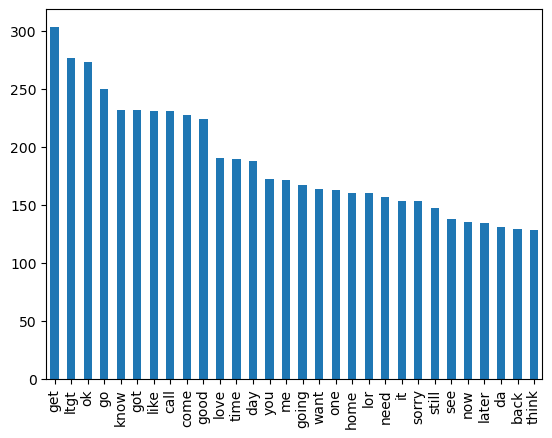

In [50]:
ham_string.value_counts()[:30].plot(kind='bar')

In [51]:
plt.rcParams["xtick.labelsize"]=5
plt.rcParams["axes.labelsize"]=5

<Axes: >

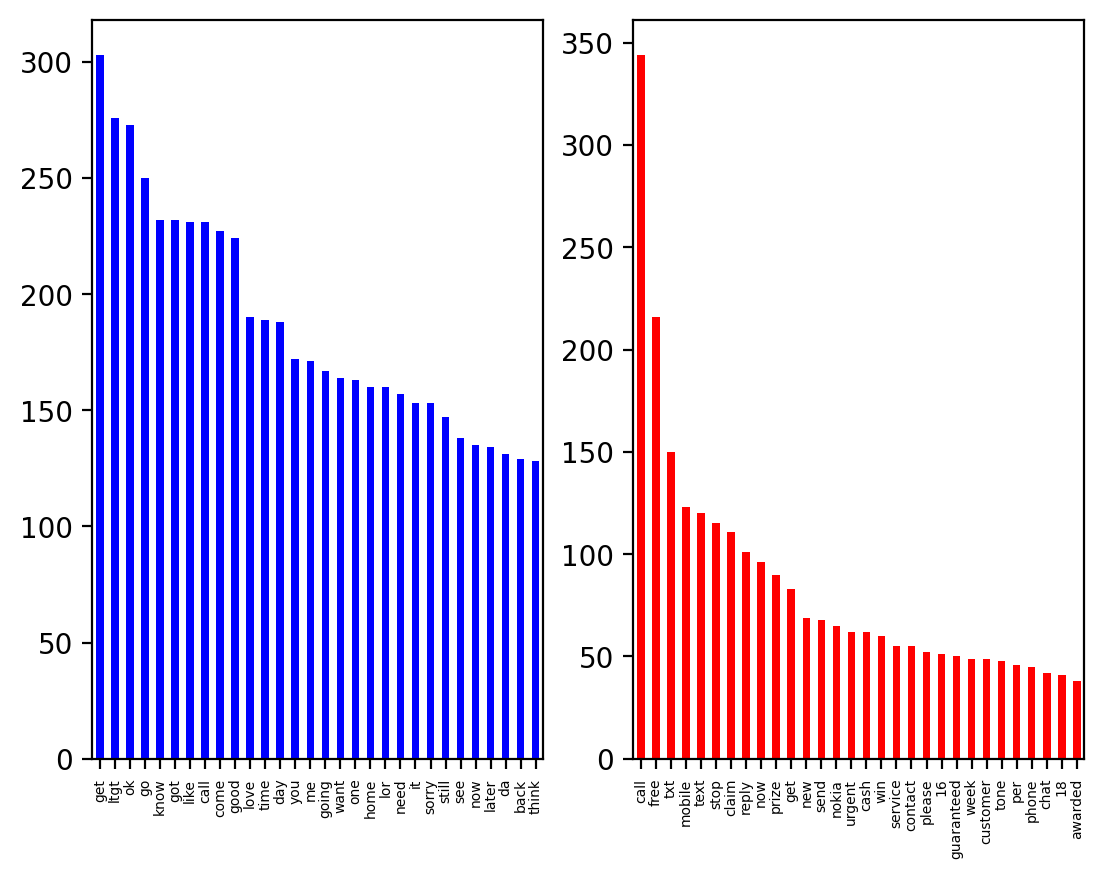

In [52]:
fig,(ax1,ax2)=plt.subplots(1,2,dpi=200)
ham_string.value_counts()[:30].plot(kind='bar',label="HAM",color="blue",ax=ax1)
spam_string.value_counts()[:30].plot(kind='bar',label="SPAM",color="red",ax=ax2)

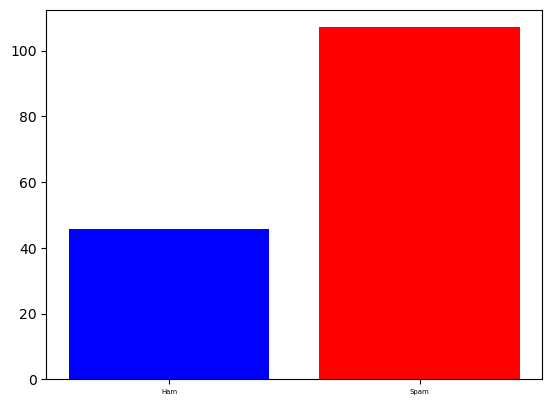

In [53]:
size1=np.mean([len(msg) for msg in ham['Message'].values])
size2=np.mean([len(msg) for msg in spam['Message'].values])
plt.bar(["Ham","Spam"],[size1,size2],color=["blue","red"])
plt.show()

In [54]:
import numpy as np

In [55]:
def plot_img(img):
    plt.figure(dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [56]:
from wordcloud import WordCloud
word_cloud=WordCloud(width=720,height=480)

In [57]:
wc=word_cloud.generate_from_text(" ".join(ham_string))

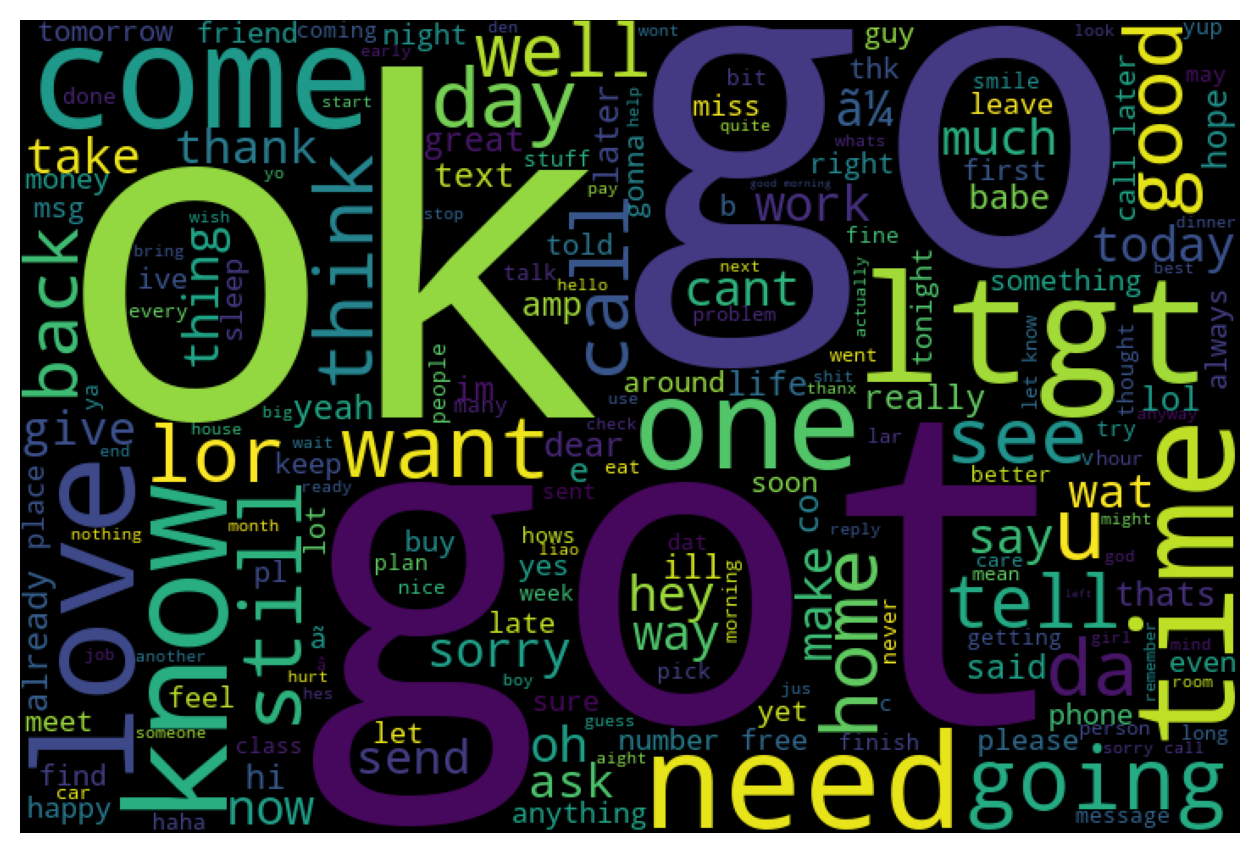

In [58]:
plot_img(wc)

In [59]:
wc=word_cloud.generate_from_text(" ".join(spam_string))

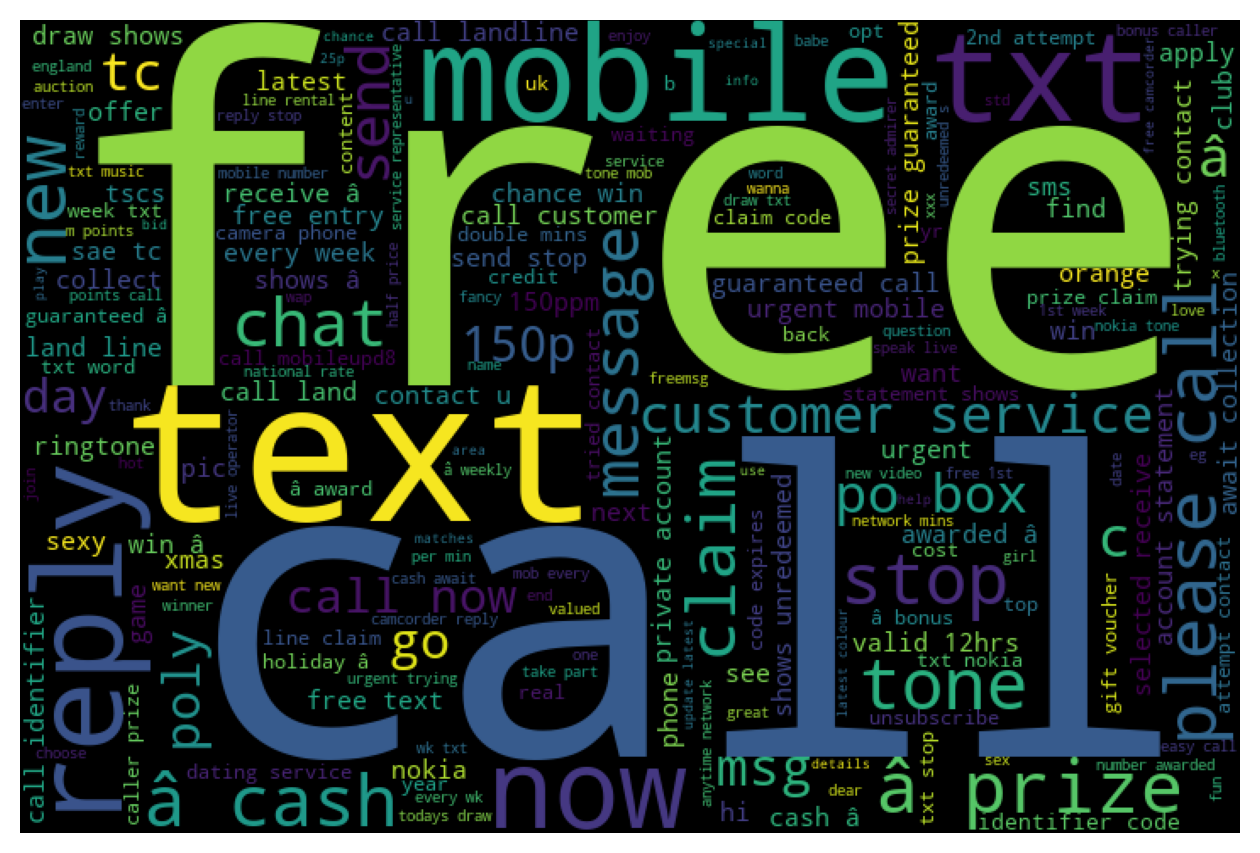

In [60]:
plot_img(wc)

In [61]:

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [62]:
import sys
print(sys.executable)


C:\Users\KIIT\anaconda3\python.exe


In [63]:
porter=PorterStemmer()

In [64]:
porter.stem("Cats")

'cat'

In [65]:
porter.stem('flying')

'fli'

In [66]:
from nltk.stem import WordNetLemmatizer

In [67]:
lemma=WordNetLemmatizer()

In [68]:
[lemma.lemmatize(word,pos='v') for word in ['dogs','fly','flying','flyer','flew','flown']]

['dog', 'fly', 'fly', 'flyer', 'fly', 'fly']

In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [71]:
corpus=[
    "hello this is python",
    "python is awesome language",
    "hello how are you",
    "python is modern language"
    "i am awesome",
    "this is best time"
]

In [72]:
def build_vocab(corpus):
    vocab=[]
    for doc in corpus:
        for word in doc.split():
            word=word.strip().lower()
            if word not in vocab:
                vocab.append(word)
    vocab.sort()
    w2v={word:vector for vector,word in enumerate(vocab)}
    v2w={vector:word for vector,word in enumerate(vocab)}
    return w2v,v2w           

In [73]:
vocab=build_vocab(corpus)
print(vocab)

({'am': 0, 'are': 1, 'awesome': 2, 'best': 3, 'hello': 4, 'how': 5, 'is': 6, 'language': 7, 'languagei': 8, 'modern': 9, 'python': 10, 'this': 11, 'time': 12, 'you': 13}, {0: 'am', 1: 'are', 2: 'awesome', 3: 'best', 4: 'hello', 5: 'how', 6: 'is', 7: 'language', 8: 'languagei', 9: 'modern', 10: 'python', 11: 'this', 12: 'time', 13: 'you'})


In [74]:
w2v,v2w=build_vocab(corpus)

In [75]:
print(w2v)

{'am': 0, 'are': 1, 'awesome': 2, 'best': 3, 'hello': 4, 'how': 5, 'is': 6, 'language': 7, 'languagei': 8, 'modern': 9, 'python': 10, 'this': 11, 'time': 12, 'you': 13}


In [76]:
print(v2w)

{0: 'am', 1: 'are', 2: 'awesome', 3: 'best', 4: 'hello', 5: 'how', 6: 'is', 7: 'language', 8: 'languagei', 9: 'modern', 10: 'python', 11: 'this', 12: 'time', 13: 'you'}


In [77]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
model=CountVectorizer()
model.fit(corpus)
tr=model.transform(corpus).toarray()
tr

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [79]:
model.vocabulary_

{'hello': 4,
 'this': 11,
 'is': 6,
 'python': 10,
 'awesome': 2,
 'language': 7,
 'how': 5,
 'are': 1,
 'you': 13,
 'modern': 9,
 'languagei': 8,
 'am': 0,
 'best': 3,
 'time': 12}

In [80]:
tf_idf = TfidfVectorizer()

In [81]:
tf_vector = tf_idf.fit_transform(corpus)

In [82]:
tf_vector.toarray().round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.56, 0.  , 0.39, 0.  , 0.  , 0.  , 0.47,
        0.56, 0.  , 0.  ],
       [0.  , 0.  , 0.52, 0.  , 0.  , 0.  , 0.36, 0.64, 0.  , 0.  , 0.43,
        0.  , 0.  , 0.  ],
       [0.  , 0.52, 0.  , 0.  , 0.42, 0.52, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.52],
       [0.48, 0.  , 0.38, 0.  , 0.  , 0.  , 0.27, 0.  , 0.48, 0.48, 0.32,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.58, 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  ,
        0.47, 0.58, 0.  ]])

In [83]:
X=df[['Message']]

In [84]:
X.head()

,Message
0,go jurong point crazy available bugis great wo...
1,ok lar joking wif oni
2,free entry wkly comp win fa cup final tkts 21s...
3,dun say early hor c already say
4,nah think goes usf lives around though


In [85]:
y=df['Category']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X_tr = vector.fit_transform(X['Message'])

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tf_vector = TfidfVectorizer()

X_tr_tf = tf_vector.fit_transform(X['Message'])

In [90]:
X_tr

<5572x9538 sparse matrix of type '<class 'numpy.int64'>'
	with 47986 stored elements in Compressed Sparse Row format>

In [91]:
X_tr_tf

<5572x9538 sparse matrix of type '<class 'numpy.float64'>'
	with 47986 stored elements in Compressed Sparse Row format>

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tr_tf, y)

In [93]:
from sklearn.svm import SVC

In [94]:
svm_clf = SVC()
svm_clf_tf = SVC()

In [95]:
svm_clf.fit(X_train, y_train)
svm_clf_tf.fit(X_train_tf, y_train_tf)

SVC()

In [96]:
y_hat = svm_clf.predict(X_test)
y_hat_tf = svm_clf_tf.predict(X_test_tf)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
print(confusion_matrix(y_test, y_hat))
print(confusion_matrix(y_test_tf, y_hat_tf))

[[1213    0]
 [  41  139]]
[[1210    0]
 [  44  139]]


In [99]:
print(classification_report(y_test, y_hat))
print(classification_report(y_test_tf, y_hat_tf))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1213
        spam       1.00      0.77      0.87       180

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1210
        spam       1.00      0.76      0.86       183

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



### Pipelining and training different models of classification

In [100]:
from sklearn.base import BaseEstimator,TransformerMixin

In [101]:
class process_raw_strings(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=False):
        self.lnc_stem=LancasterStemmer()
        self.lemma=WordNetLemmatizer()
        self.stopwords=STOPWORDS.words("english")
        if stopwords:
            self.stopwords=list(set(self.stopwords+stopwords))
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        process_documents=[]
        for msg in X:
            msg=msg.lower()
            msg=re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~)]","",msg)
            sentence=[]
            for words in msg.split():
                  if words not in self.stopwords:
                        lemitize=self.lemma.lemmatize(words)
                        stem=self.lnc_stem.stem(lemitize)
                        sentence.append(words)
            msg=" ".join(sentence)
            process_documents.append(msg)
    
        return process_documents
            

In [102]:
process=process_raw_strings()

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [104]:
cv=CountVectorizer()

In [105]:
from sklearn.pipeline import Pipeline

In [106]:
model=Pipeline([
    ('process raw strings',process_raw_strings()),
    ('vectorization',CountVectorizer()),
    ('tf idf',TfidfTransformer()),
    ('naive bayes',MultinomialNB())
    
    
])

In [107]:
data=pd.read_csv('spam.csv',usecols=[0,1],encoding='latin')
data.rename({'v1':'label','v2':'message'},axis=1,inplace=True)

In [108]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X=data['Message']
y=data['Category']

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
model.fit(X_train,y_train)

Pipeline(steps=[('process raw strings',
                 process_raw_strings(stopwords=['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
                                                'herself', 'it', "it's", 'its',
                                                'itself', ...])),
                ('vectorization', CountVectorizer()),
                ('tf idf', TfidfTransformer()),
                ('naive bayes', MultinomialNB())])

In [113]:
pred=model.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix,classification_report

In [115]:
print(confusion_matrix(y_test,pred))

[[966   0]
 [ 34 115]]


In [116]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [117]:
pipeline = Pipeline([
    ('process raw strings',process_raw_strings()),
    ('vectorization',CountVectorizer()), 
    ('svm classifier', SVC())
])


pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train) # 
y_hat_test  = pipeline.predict(X_test)

def evaluation_report(y, y_hat):
    print("Confusion Matrix: ")
    print(confusion_matrix(y, y_hat))
    print("Classifcation Report: ")
    print(classification_report(y, y_hat))
    
print("Training Report")
evaluation_report(y_train, y_hat_train)
print('\n\n', '_'*50)
print("Test Report")
evaluation_report(y_test, y_hat_test)

Training Report
Confusion Matrix: 
[[3859    0]
 [  20  578]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3859
        spam       1.00      0.97      0.98       598

    accuracy                           1.00      4457
   macro avg       1.00      0.98      0.99      4457
weighted avg       1.00      1.00      1.00      4457



 __________________________________________________
Test Report
Confusion Matrix: 
[[966   0]
 [ 23 126]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
pipeline = Pipeline([
    ('process raw strings',process_raw_strings()),
    ('vectorization',CountVectorizer())
])
X_train_tr=pipeline.fit_transform(X_train)

In [120]:
param_grid = {
    'C': [0.1, 1, 10, 100,1000],           # Penalty parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],    # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
}


In [121]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [122]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [123]:
grid_search.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [124]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.svm import SVC
warnings.filterwarnings(action='ignore')
class process_raw_strings(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=False):
        self.lnc_stem=LancasterStemmer()
        self.lemma=WordNetLemmatizer()
        self.stopwords=STOPWORDS.words("english")
        if stopwords:
            self.stopwords=list(set(self.stopwords+stopwords))
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        process_documents=[]
        for msg in X:
            msg=msg.lower()
            msg=re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~)]","",msg)
            sentence=[]
            for words in msg.split():
                  if words not in self.stopwords:
                        lemitize=self.lemma.lemmatize(words)
                        stem=self.lnc_stem.stem(lemitize)
                        sentence.append(words)
            msg=" ".join(sentence)
            process_documents.append(msg)
    
        return process_documents
data= pd.read_csv('spam.csv', encoding='latin')
X = data['Message']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
pipeline = Pipeline([
    ('process raw strings',process_raw_strings()),
    ('vectorization',CountVectorizer()), 
    ('svm classifier', SVC(kernel='linear',gamma='scale',C=1))
])
pipeline.fit(X_train, y_train)
y_hat_train = pipeline.predict(X_train) # 
y_hat_test  = pipeline.predict(X_test)

def evaluation_report(y, y_hat):
    print("Confusion Matrix: ")
    print(confusion_matrix(y, y_hat))
    print("Classifcation Report: ")
    print(classification_report(y, y_hat))
    
print("Training Report")
evaluation_report(y_train, y_hat_train)
print('\n\n', '_'*50)
print("Test Report")
evaluation_report(y_test, y_hat_test)


Training Report
Confusion Matrix: 
[[3863    0]
 [   0  594]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3863
        spam       1.00      1.00      1.00       594

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



 __________________________________________________
Test Report
Confusion Matrix: 
[[960   2]
 [ 12 141]]
Classifcation Report: 
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       962
        spam       0.99      0.92      0.95       153

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [125]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4457,)
y_train shape: (4457,)
X_test shape: (1115,)
y_test shape: (1115,)


In [148]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings

warnings.filterwarnings(action='ignore')
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import time
class process_raw_strings(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=False):
        self.lnc_stem=LancasterStemmer()
        self.lemma=WordNetLemmatizer()
        self.stopwords=STOPWORDS.words("english")
        if stopwords:
            self.stopwords=list(set(self.stopwords+stopwords))
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        process_documents=[]
        for msg in X:
            msg=msg.lower()
            msg=re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~)]","",msg)
            sentence=[]
            for words in msg.split():
                  if words not in self.stopwords:
                        lemitize=self.lemma.lemmatize(words)
                        stem=self.lnc_stem.stem(lemitize)
                        sentence.append(words)
            msg=" ".join(sentence)
            process_documents.append(msg)
    
        return process_documents
data= pd.read_csv('spam.csv', encoding='latin')
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
pipeline = Pipeline([
    ('process raw strings',process_raw_strings()),
    ('vectorization',CountVectorizer()), 
    ('TF-IDF Vectorizer', TfidfTransformer()) # uncomment this and see what changes
    
])
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr  = pipeline.transform(X_test)
models = [
    ("SVM Classifier", SVC(kernel='linear',gamma='scale',C=1)),
    ("Navie Bays", MultinomialNB()),
    ("Random Forest", RandomForestClassifier()),
    ("K Nearest Neighbour", KNeighborsClassifier(n_neighbors=20)),
    ("SGD Classifier", SGDClassifier(loss='log')),
]
def fit_model(model, X, y):
    print(f"Fitting Model: {model.__class__.__name__}")
    start_time = time.monotonic()
    model.fit(X, y)
    end_time = time.monotonic()
    print("Time Taken in Fitting: ", end_time - start_time)
def predict_model(model, X):
    print(f"\nPredicting with Model: {model.__class__.__name__}")
    start_time = time.monotonic()
    y_hat = model.predict(X)
    end_time = time.monotonic()
    print("Time Taken in Prediction: ", end_time - start_time)
    print("\n", "_" * 80, "\n")
    return y_hat
def train_models(models, X, y):
    for model_name, model_instance in models:
        fit_model(model_instance, X, y)
        joblib.dump(model_instance, f'{model_name}_model.pkl')
        y_hat = predict_model(model_instance, X)



joblib.dump(pipeline, 'preprocessing_pipeline.pkl')   

['preprocessing_pipeline.pkl']

In [149]:
train_models(models,X_train_tr, y_train)

Fitting Model: SVC
Time Taken in Fitting:  1.1410000000614673

Predicting with Model: SVC
Time Taken in Prediction:  0.8279999999795109

 ________________________________________________________________________________ 

Fitting Model: MultinomialNB
Time Taken in Fitting:  0.015999999828636646

Predicting with Model: MultinomialNB
Time Taken in Prediction:  0.0

 ________________________________________________________________________________ 

Fitting Model: RandomForestClassifier
Time Taken in Fitting:  5.218000000109896

Predicting with Model: RandomForestClassifier
Time Taken in Prediction:  0.3589999999385327

 ________________________________________________________________________________ 

Fitting Model: KNeighborsClassifier
Time Taken in Fitting:  0.01600000006146729

Predicting with Model: KNeighborsClassifier
Time Taken in Prediction:  1.125

 ________________________________________________________________________________ 

Fitting Model: SGDClassifier
Time Taken in Fitting

In [140]:
def score_models(models, X, y):
    for name, model in models:
        
        y_hat = model.predict_proba(X)[:, 1]
        score = roc_auc_score(y, y_hat)
        print(f"{name:>30} Model's ROC AUC Score is {score:.2f}")
def plot_roc_curve(models, X, y):
    plt.figure(dpi=150)
    for name, model in models:
        y_hat = model.predict_proba(X)[:, 1]
        fpr, tpr, th = roc_curve(y, y_hat, pos_label='spam')
        plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], 'k--', label='Bad Model')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

                SVM Classifier Model's ROC AUC Score is 1.00
                    Navie Bays Model's ROC AUC Score is 1.00
                 Random Forest Model's ROC AUC Score is 1.00
           K Nearest Neighbour Model's ROC AUC Score is 0.99
                SGD Classifier Model's ROC AUC Score is 1.00


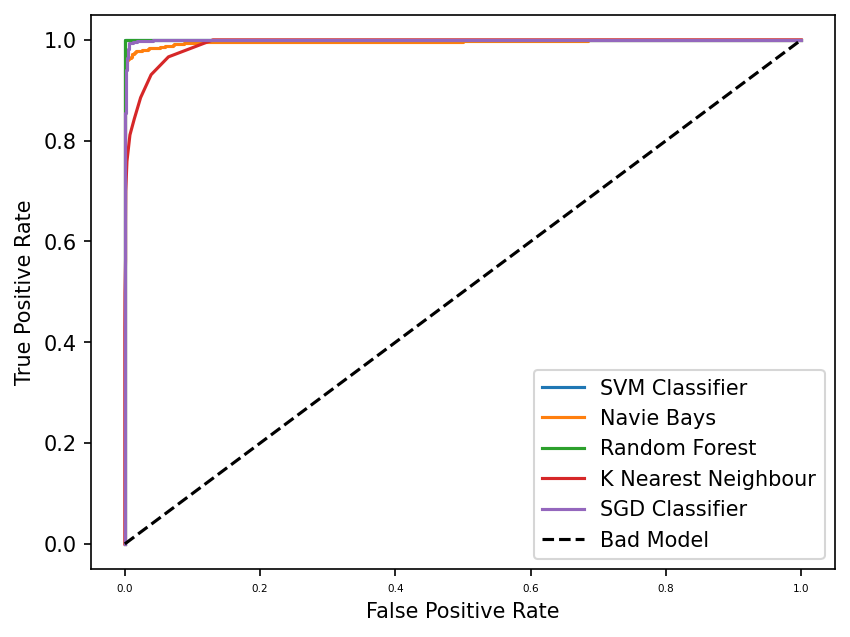

In [145]:
score_models(models, X_train_tr, y_train)
plot_roc_curve(models, X_train_tr, y_train)

In [137]:
vectorizer = pipeline.named_steps['TF-IDF Vectorizer']  # or 'vectorization' if using CountVectorizer
joblib.dump(vectorizer, 'text_vectorizer.pkl')

['text_vectorizer.pkl']